In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv(r'C:\\Users\\86130\\00.Project\\03.Datasets\\Industry power load maximun and minimun values-10-21.csv')
data.head()

,sector type,datatime,Average Power Max（kw）,Average Power Min（kw）
0,Large industrial electricity,1/1/2019,117888.3300,51526.5690
1,Large industrial electricity,1/2/2019,126843.7914,63638.4294
2,Large industrial electricity,1/3/2019,130286.1294,102048.2754
3,Large industrial electricity,1/4/2019,133018.6344,104466.0762
4,Large industrial electricity,1/5/2019,133504.4784,99507.3528


In [3]:
# Convert 'datatime' to datetime and filter for 'Large industrial electricity'
data['datatime'] = pd.to_datetime(data['datatime'], format='%m/%d/%Y')
filtered_data = data[data['sector type'] == 'Large industrial electricity']

# Analyzing 'Average Power Max（kw）'
filtered_series = filtered_data['Average Power Max（kw）']
dates = filtered_data['datatime']

In [4]:

# Calculate the mean and median
mean_value = filtered_series.mean()
median_value = filtered_series.median()

# Calculate the deviations from the mean and median
deviation_from_mean = np.abs(filtered_series - mean_value)
deviation_from_median = np.abs(filtered_series - median_value)

# Set stricter thresholds for anomaly detection
strict_mean_threshold = 3 * deviation_from_mean.std()
strict_median_threshold = 3 * deviation_from_median.std()

# Identify stricter anomalies
strict_anomalies_from_mean = filtered_series[deviation_from_mean > strict_mean_threshold]
strict_anomalies_from_median = filtered_series[deviation_from_median > strict_median_threshold]



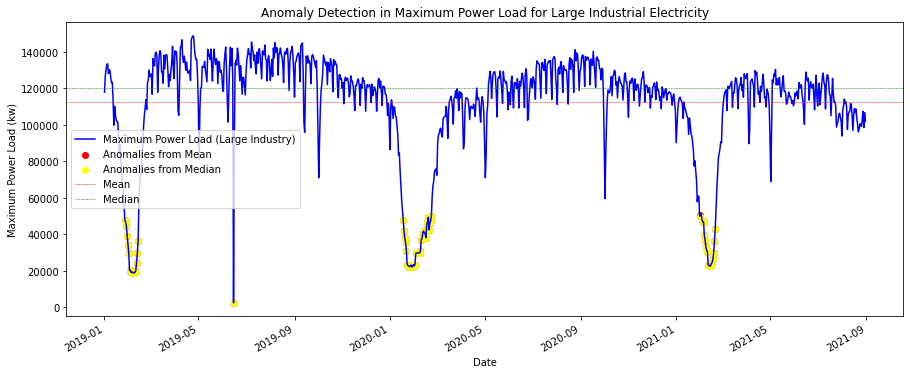

In [9]:
# Plotting the results with dates on the x-axis
plt.figure(figsize=(15, 6))
plt.plot(dates, filtered_series, label='Maximum Power Load (Large Industry)', color='blue')
plt.scatter(dates.iloc[strict_anomalies_from_mean.index], strict_anomalies_from_mean.values, color='red', label='Anomalies from Mean')
plt.scatter(dates.iloc[strict_anomalies_from_median.index], strict_anomalies_from_median.values, color='yellow', label='Anomalies from Median')
plt.axhline(mean_value, color='red', linestyle='--', linewidth=0.5, label='Mean')
plt.axhline(median_value, color='green', linestyle='--', linewidth=0.5, label='Median')
plt.title('Anomaly Detection in Maximum Power Load for Large Industrial Electricity')
plt.xlabel('Date')
plt.ylabel('Maximum Power Load (kw)')
plt.legend()
plt.gcf().autofmt_xdate()  # Rotate date labels to fit them nicely
plt.show()

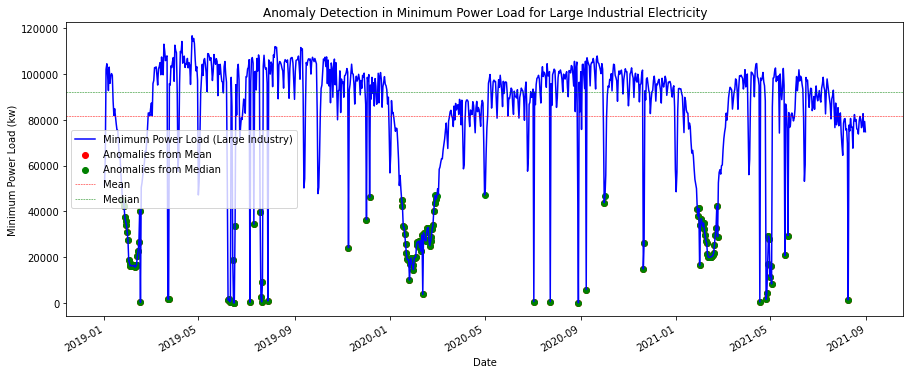

In [17]:
min_series = filtered_data['Average Power Min（kw）']
dates = filtered_data['datatime']
# Calculate the mean and median
mean_value = min_series.mean()
median_value = min_series.median()

# Calculate the deviations from the mean and median
deviation_from_mean = np.abs(min_series - mean_value)
deviation_from_median = np.abs(min_series - median_value)

# Set thresholds for anomaly detection (can be adjusted)
mean_threshold = 2 * deviation_from_mean.std()
median_threshold = 2 * deviation_from_median.std()

# Identify anomalies
anomalies_from_mean = min_series[deviation_from_mean > mean_threshold]
anomalies_from_median = min_series[deviation_from_median > median_threshold]

# Plotting the results with dates on the x-axis
plt.figure(figsize=(15, 6))
plt.plot(dates, min_series, label='Minimum Power Load (Large Industry)', color='blue')
plt.scatter(dates.iloc[anomalies_from_mean.index], anomalies_from_mean.values, color='red', label='Anomalies from Mean')
plt.scatter(dates.iloc[anomalies_from_median.index], anomalies_from_median.values, color='green', label='Anomalies from Median')
plt.axhline(mean_value, color='red', linestyle='--', linewidth=0.5, label='Mean')
plt.axhline(median_value, color='green', linestyle='--', linewidth=0.5, label='Median')
plt.title('Anomaly Detection in Minimum Power Load for Large Industrial Electricity')
plt.xlabel('Date')
plt.ylabel('Minimum Power Load (kw)')
plt.legend()
plt.gcf().autofmt_xdate()  # Rotate date labels to fit them nicely
plt.show()